# Table of Content

- [Importing necessary Data Science Python libraries for our Project](#Importing-necessary-Data-Science-Python-libraries-for-our-Project)
- [Data Cleaning](#Data-Cleaning)
- [Data Analysis](#Data-Analysis)
    - [Analysis 1 - Where do the maximum guests come from ? (Spatial Analysis)](#Analysis-1]-Where-do-the-maximum-guests-come-from-?-(Spatial-Analysis))
    - [Analysis 2 - How much do guests pay for a room per night?](#Analysis-2]-How-much-do-guests-pay-for-a-room-per-night?)
    - [Analysis 3 - How does the price per night vary over the year?](#Analysis-3]-How-does-the-price-per-night-vary-over-the-year?)
    - [Analysis 4 - Which months are the most busiest months or in which months bookings are high in number?](#Analysis-4]-Which-months-are-the-most-busiest-months-or-in-which-months-bookings-are-high-in-number?)
    - [Analysis 5 - How long do guests stay at the hotels?](#Analysis-5]-How-long-do-guests-stay-at-the-hotels?)
    - [Analysis 6 - Bookings by market segment](#Analysis-6]-Bookings-by-market-segment)
    - [Analysis 7 - How many bookings were cancelled?](#Analysis-7]-How-many-bookings-were-cancelled?)
    - [Analysis 8 - Which month have the highest number of Cancellations?](#Analysis-8]-Which-month-have-the-highest-number-of-Cancellations?)
- [Selecting important numerical features(attributes) using Correlation](#Selecting-important-numerical-features(attributes)-using-Correlation)
- [Refining numerical features](#Refining-numerical-features)
- [Refining categorical features](#Refining-categorical-features)
- [Feature Encoding](#Feature-Encoding)
    - [Mean Encoding for Categorical features/attributes](#Mean-Encoding-for-Categorical-features/attributes)
- [Preparing our Data for Machine Learning](#Preparing-our-Data-for-Machine-Learning)
    - [Handling the Outliers in the data](#Handling-the-Outliers-in-the-data)
- [Feature Importance](#Feature-Importance)
- [Splitting the data and Builing the Model](#Splitting-the-data-and-Builing-the-Model)
    - [Implementing logistic regression](#Implementing-logistic-regression)
    - [Implementing different classification algorithms to decide which one is best](#Implementing-different-classification-algorithms-to-decide-which-one-is-best)
- [Conclusion](#As-per-above-results-we-can-conclude-that-Random-Forest-is-the-best-model-we-can-use-to-predict-the-Hotel-Booking-Cancellation-of-potential-customers-as-this-model-has-the-highest-accuracy-of-92%.)

# Importing necessary Data Science Python libraries for our Project

In [284]:
import pandas as pd # For data manipulation
import numpy as np # For numerical operations

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [285]:
# For handling warnings
import warnings
from warnings import filterwarnings
filterwarnings("ignore") # Ignore warnings

In [286]:
df = pd.read_csv("Data/hotel_bookings.csv") # import the hotel bookings data into our project
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


# Data Cleaning

In [287]:
df.shape # Number of (rows, columns) in the DataFrame df

(119390, 32)

In [288]:
df.isna() # To check for any Null values in our dataset

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [289]:
df.isna().sum() # To check for any Null values in our dataset

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [290]:
# below function replaces Null values in our data with 0
def data_clean(df):
    df.fillna(0,inplace = True) # zero imputation
    print(df.isnull().sum())

In [291]:
data_clean(df) # As per below result, now there are no Null values in our data

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [292]:
df.isna().sum() # As per below result, now there are no Null values in our data

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [293]:
# finding unique values of attributes "adults", "children" and "babies"

list_cols = ["adults", "children", "babies"]

for i in list_cols:
    print(f"{i} has unique values as {df[i].unique()}")

adults has unique values as [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
children has unique values as [ 0.  1.  2. 10.  3.]
babies has unique values as [ 0  1  2 10  9]


In [294]:
# cleaning the unreal data

filtered_data = (df["adults"] == 0) & (df["children"] == 0) & (df["babies"] == 0) # data which represents a booking where nobody came

final_data = df[~filtered_data] # filtering out above unreal data from the main data

In [295]:
final_data.shape         # final_data is our final clean data which we will use for analysis

(119210, 32)

# Data Analysis

## Analysis 1] Where do the maximum guests come from ? (Spatial Analysis)

In [296]:
# Filter rows where booking is not canceled and then count the occurrences of each country in the 'country' column
country_wise_data = final_data[final_data['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_data.columns = ["country", "No. of guests"]     # rename the columns to "country" and "No. of guests"
print(country_wise_data)

    country  No. of guests
0       PRT          20977
1       GBR           9668
2       FRA           8468
3       ESP           6383
4       DEU           6067
..      ...            ...
161     BHR              1
162     DJI              1
163     MLI              1
164     NPL              1
165     FRO              1

[166 rows x 2 columns]


In [297]:
# data visualization
import plotly.express as px


In [298]:
map_guests = px.choropleth(country_wise_data, locations = country_wise_data['country'],
                           color = country_wise_data["No. of guests"],
                           hover_name = country_wise_data["country"],
                           title = "Home country of guests"
                          )

map_guests.update_layout(
    autosize = False,
    width = 1000,
    height = 600
)

map_guests.show("notebook_connected")

## Analysis 2] How much do guests pay for a room per night?

In [299]:
final_data["hotel"].unique()      # Return unique values in the "hotel" column of final_data

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [300]:
data = final_data[final_data['is_canceled'] == 0]    # Filter rows where booking is not canceled

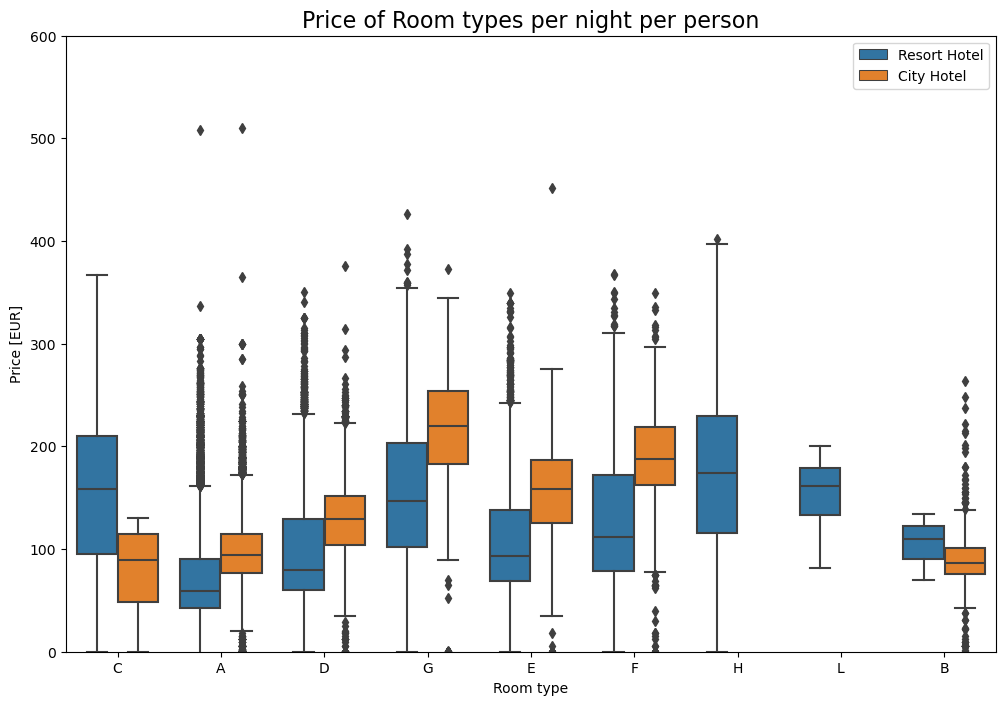

In [301]:
# data visualization using box plot

plt.figure(figsize = (12,8))

sns.boxplot(x = "reserved_room_type",
            y = "adr",
            hue = "hotel",
            data = data)

plt.title("Price of Room types per night per person", fontsize = 16)
plt.xlabel("Room type")
plt.ylabel("Price [EUR]")
plt.legend(loc = "upper right")
plt.ylim(0,600)
plt.show()

## Analysis 3] How does the price per night vary over the year?

In [302]:
final_data["hotel"].unique()  # Return unique values in the "hotel" column of final_data

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [303]:
data_resort = final_data[(final_data["hotel"] == "Resort Hotel") & (final_data['is_canceled'] == 0)] # Filter rows for 'Resort Hotel' where 'is_canceled' is 0

data_city = final_data[(final_data["hotel"] == "City Hotel") & (final_data['is_canceled'] == 0)] # Filter rows for 'City Hotel' where 'is_canceled' is 0

In [304]:
# Grouping both hotels' data by "arrival_date_month" and calculating average price of room per night per person

resort_hotel = data_resort.groupby(["arrival_date_month"])["adr"].mean().reset_index()

city_hotel = data_city.groupby(["arrival_date_month"])["adr"].mean().reset_index()

In [305]:
final = resort_hotel.merge(city_hotel, on = "arrival_date_month")
print(final)

   arrival_date_month       adr_x       adr_y
0               April   75.867816  111.962267
1              August  181.205892  118.674598
2            December   68.410104   88.401855
3            February   54.147478   86.520062
4             January   48.761125   82.330983
5                July  150.122528  115.818019
6                June  107.974850  117.874360
7               March   57.056838   90.658533
8                 May   76.657558  120.669827
9            November   48.706289   86.946592
10            October   61.775449  102.004672
11          September   96.416860  112.776582


In [306]:
final.columns = ["month", "price_for_resort_hotel", "price_for_city_hotel"]
print(final)

        month  price_for_resort_hotel  price_for_city_hotel
0       April               75.867816            111.962267
1      August              181.205892            118.674598
2    December               68.410104             88.401855
3    February               54.147478             86.520062
4     January               48.761125             82.330983
5        July              150.122528            115.818019
6        June              107.974850            117.874360
7       March               57.056838             90.658533
8         May               76.657558            120.669827
9    November               48.706289             86.946592
10    October               61.775449            102.004672
11  September               96.416860            112.776582


In [307]:
# Creating a function for Sorting the above table by month
test = final

from calendar import month_name

def sort_month(df, colname):
    month_dict = {j:i for i, j in enumerate(month_name)}
    df["month_num"] = df[colname].apply(lambda x: month_dict[x])
    return df.sort_values(by = "month_num").reset_index().drop(['index', 'month_num'], axis = 1)

sort_month(test, "month")

,month,price_for_resort_hotel,price_for_city_hotel
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


In [308]:
final = sort_month(test, "month")

In [309]:
print(final)

        month  price_for_resort_hotel  price_for_city_hotel
0     January               48.761125             82.330983
1    February               54.147478             86.520062
2       March               57.056838             90.658533
3       April               75.867816            111.962267
4         May               76.657558            120.669827
5        June              107.974850            117.874360
6        July              150.122528            115.818019
7      August              181.205892            118.674598
8   September               96.416860            112.776582
9     October               61.775449            102.004672
10   November               48.706289             86.946592
11   December               68.410104             88.401855


<Axes: xlabel='month'>

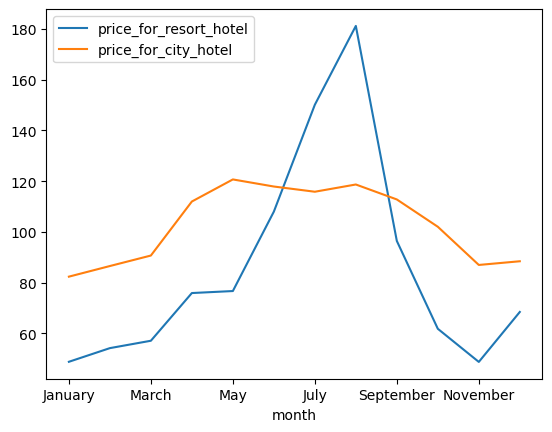

In [310]:
# data visualization using line graph

final.plot(kind = "line", x = "month", y = ['price_for_resort_hotel', 'price_for_city_hotel'])

## Analysis 4] Which months are the most busiest months or in which months bookings are high in number?

In [311]:
# fetching total number of bookings for resort hotel monthwise
rush_resort = data_resort["arrival_date_month"].value_counts().reset_index()
print(rush_resort)

   arrival_date_month  count
0              August   3257
1                July   3137
2             October   2575
3               March   2571
4               April   2550
5                 May   2535
6            February   2308
7           September   2102
8                June   2037
9            December   2014
10           November   1975
11            January   1866


In [312]:
rush_resort.columns = ["month", "No. of bookings"]
print(rush_resort)

        month  No. of bookings
0      August             3257
1        July             3137
2     October             2575
3       March             2571
4       April             2550
5         May             2535
6    February             2308
7   September             2102
8        June             2037
9    December             2014
10   November             1975
11    January             1866


In [313]:
# fetching total number of bookings for city hotel monthwise
rush_city = data_city["arrival_date_month"].value_counts().reset_index()
rush_city.columns = ["month", "No. of bookings"]
print(rush_city)

        month  No. of bookings
0      August             5367
1        July             4770
2         May             4568
3        June             4358
4     October             4326
5   September             4283
6       March             4049
7       April             4010
8    February             3051
9    November             2676
10   December             2377
11    January             2249


In [314]:
# merging rush_resort and rush_city

final_rush = rush_resort.merge(rush_city, on = "month")
final_rush.columns = ["month", "No. of bookings in Resort hotel", "No. of bookings in City hotel"]
final_rush

,month,No. of bookings in Resort hotel,No. of bookings in City hotel
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [315]:
# sorting above data by month

final_rush = sort_month(final_rush, "month")
final_rush

,month,No. of bookings in Resort hotel,No. of bookings in City hotel
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


<Axes: xlabel='month'>

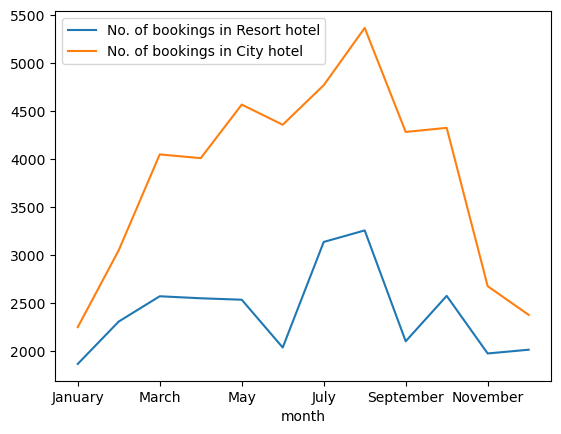

In [316]:
# visualizing above data for identifying trend using line graph

final_rush.plot(kind = "line", 
                x = "month", 
                y = ["No. of bookings in Resort hotel", "No. of bookings in City hotel"]
               )

## Analysis 5] How long do guests stay at the hotels?

In [317]:
filter_condition = final_data["is_canceled"] == 0
clean_data = final_data[filter_condition]
clean_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [318]:
#adding stays in nights values
clean_data["total_nights"] = clean_data["stays_in_weekend_nights"] + clean_data["stays_in_week_nights"]
clean_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015,2


In [319]:
stay = clean_data.groupby(["total_nights", "hotel"]).agg('count').reset_index()

In [320]:
stay

,total_nights,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,City Hotel,251,251,251,251,251,251,251,251,...,251,251,251,251,251,251,251,251,251,251
1,0,Resort Hotel,371,371,371,371,371,371,371,371,...,371,371,371,371,371,371,371,371,371,371
2,1,City Hotel,9155,9155,9155,9155,9155,9155,9155,9155,...,9155,9155,9155,9155,9155,9155,9155,9155,9155,9155
3,1,Resort Hotel,6579,6579,6579,6579,6579,6579,6579,6579,...,6579,6579,6579,6579,6579,6579,6579,6579,6579,6579
4,2,City Hotel,10983,10983,10983,10983,10983,10983,10983,10983,...,10983,10983,10983,10983,10983,10983,10983,10983,10983,10983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,46,Resort Hotel,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
58,48,City Hotel,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
59,56,Resort Hotel,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
60,60,Resort Hotel,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [321]:
stay.iloc[:, 0:3]

,total_nights,hotel,is_canceled
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983
...,...,...,...
57,46,Resort Hotel,1
58,48,City Hotel,1
59,56,Resort Hotel,1
60,60,Resort Hotel,1


In [322]:
stay = stay.iloc[:, 0:3]

In [323]:
stay

,total_nights,hotel,is_canceled
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983
...,...,...,...
57,46,Resort Hotel,1
58,48,City Hotel,1
59,56,Resort Hotel,1
60,60,Resort Hotel,1


In [324]:
stay.columns = ["total_nights", "hotel", "No. of bookings"]

In [325]:
stay

,total_nights,hotel,No. of bookings
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983
...,...,...,...
57,46,Resort Hotel,1
58,48,City Hotel,1
59,56,Resort Hotel,1
60,60,Resort Hotel,1


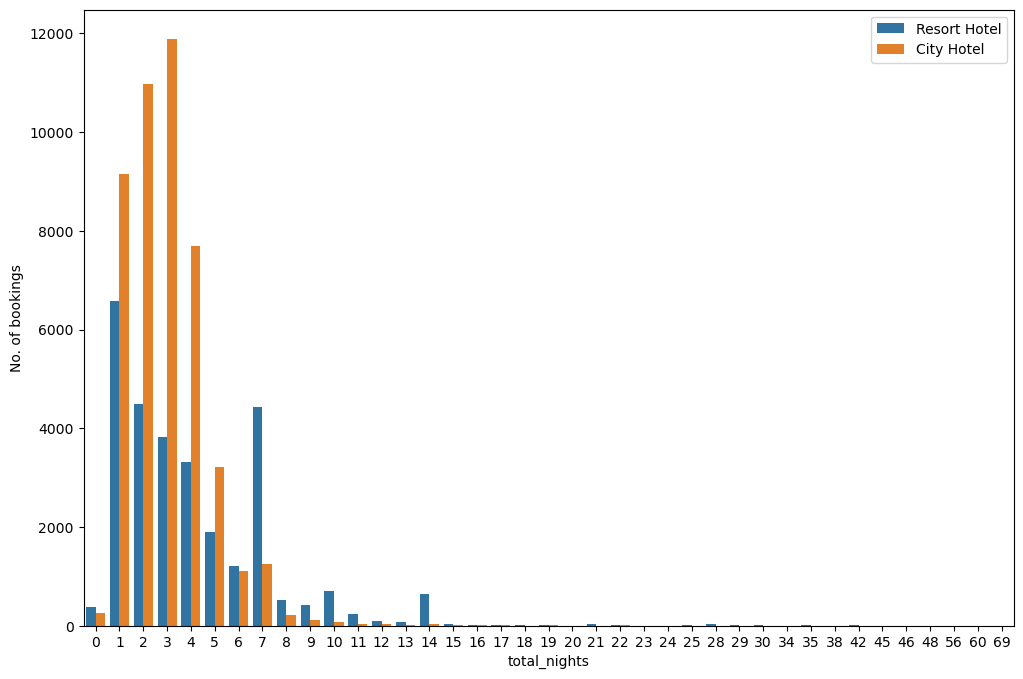

In [326]:
#visualizing above data
plt.figure(figsize = (12,8))
sns.barplot(x = "total_nights",
            y = "No. of bookings",
            hue = "hotel",
            hue_order = ["Resort Hotel", "City Hotel"],
            data = stay
           )
plt.legend(loc = "upper right")

## Analysis 6] Bookings by market segment

In [327]:
segments = final_data["market_segment"].value_counts()
segments

market_segment
Online TA        56408
Offline TA/TO    24182
Groups           19791
Direct           12582
Corporate         5282
Complementary      728
Aviation           235
Undefined            2
Name: count, dtype: int64

In [328]:
# visualization by pie chart
import plotly.express as px
booking_viz = px.pie(segments,
                     values = segments.values,
                     names = segments.index,
                     title = "Bookings by market segment",
                     template = "seaborn"
                    )
booking_viz.update_traces(rotation = -90, textinfo = "percent+label")
booking_viz.update_layout(width=800, height=600)
booking_viz.show("notebook_connected")

## Analysis 7] How many bookings were cancelled?

In [329]:
Canceled_bookings = final_data["is_canceled"] == 1
total_canceled_bookings = Canceled_bookings.sum()

total_resort_canceled_bookings = final_data.loc[final_data["hotel"] == "Resort Hotel"]["is_canceled"].sum()
total_city_canceled_bookings = final_data.loc[final_data["hotel"] == "City Hotel"]["is_canceled"].sum()

print(f"Total Bookings Cancelled : {total_canceled_bookings}")
print(f"Total Resort Hotel Bookings Cancelled : {total_resort_canceled_bookings}")
print(f"Total City Hotel Bookings Cancelled : {total_city_canceled_bookings}")

Total Bookings Cancelled : 44199
Total Resort Hotel Bookings Cancelled : 11120
Total City Hotel Bookings Cancelled : 33079


## Analysis 8] Which month have the highest number of Cancellations?

In [330]:
res_book_per_month = final_data.loc[(final_data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
res_cancel_per_month = final_data.loc[(final_data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

cty_book_per_month = final_data.loc[(final_data["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
cty_cancel_per_month = final_data.loc[(final_data["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

res_cancel_data = pd.DataFrame({"Hotel": "Resort Hotel", 
                                "Month": list(res_book_per_month.index), 
                                "Bookings": list(res_book_per_month.values), 
                                "Cancelations": list(res_cancel_per_month.values)})
res_cancel_data = sort_month(res_cancel_data, "Month")

cty_cancel_data = pd.DataFrame({"Hotel": "City Hotel", 
                                "Month": list(cty_book_per_month.index), 
                                "Bookings": list(cty_book_per_month.values), 
                                "Cancelations": list(cty_cancel_per_month.values)})
cty_cancel_data = sort_month(cty_cancel_data, "Month")

In [331]:
res_cancel_data

,Hotel,Month,Bookings,Cancelations
0,Resort Hotel,January,2191,325
1,Resort Hotel,February,3102,794
2,Resort Hotel,March,3334,763
3,Resort Hotel,April,3609,1059
4,Resort Hotel,May,3559,1024
5,Resort Hotel,June,3044,1007
6,Resort Hotel,July,4573,1436
7,Resort Hotel,August,4894,1637
8,Resort Hotel,September,3108,1006
9,Resort Hotel,October,3553,978


In [332]:
cty_cancel_data

,Hotel,Month,Bookings,Cancelations
0,City Hotel,January,3730,1481
1,City Hotel,February,4950,1899
2,City Hotel,March,6434,2385
3,City Hotel,April,7469,3459
4,City Hotel,May,8221,3653
5,City Hotel,June,7885,3527
6,City Hotel,July,8071,3301
7,City Hotel,August,8967,3600
8,City Hotel,September,7392,3109
9,City Hotel,October,7594,3268


In [333]:
# data visualization
import plotly.graph_objects as go
import plotly.io as pyo
pyo.renderers.default = "notebook_connected"

plt.figure(figsize = (12, 8))

trace = go.Bar(
    x = res_cancel_data["Month"],
    y = res_cancel_data["Cancelations"],
    name = "Resort Hotel Bookings Cancelled")

trace1 = go.Bar(
    x = cty_cancel_data["Month"],
    y = cty_cancel_data["Cancelations"],
    name = "City Hotel Bookings Cancelled")

data6 = [trace, trace1]

layout = go.Layout(
    title = "Total Booking Cancellations by Month")

fig = go.Figure(data = data6, layout = layout)
pyo.show(fig)

<Figure size 1200x800 with 0 Axes>

# Selecting important numerical features(attributes) using Correlation

In [334]:
final_data.corr(numeric_only=True)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.292876,0.016622,0.008315,-0.005948,-0.001323,0.025542,0.058182,0.004851,-0.032569,-0.083745,0.110139,-0.057365,-0.144832,-0.046770,-0.083594,0.054301,0.046492,-0.195701,-0.234877
lead_time,0.292876,1.000000,0.040334,0.127046,0.002306,0.085985,0.166892,0.117575,-0.037878,-0.021003,-0.123209,0.086025,-0.073599,0.002230,-0.013114,-0.085854,0.170008,-0.065018,-0.116624,-0.095949
arrival_date_year,0.016622,0.040334,1.000000,-0.540373,-0.000121,0.021694,0.031203,0.030266,0.054710,-0.013192,0.010281,-0.119905,0.029234,0.031416,0.056438,0.033682,-0.056348,0.198429,-0.013812,0.108610
arrival_date_week_number,0.008315,0.127046,-0.540373,1.000000,0.066572,0.018629,0.016047,0.026567,0.005556,0.010417,-0.031125,0.035493,-0.021009,0.006311,-0.018225,-0.032912,0.022677,0.076281,0.001980,0.026202
arrival_date_day_of_month,-0.005948,0.002306,-0.000121,0.066572,1.000000,-0.016225,-0.028362,-0.001754,0.014550,-0.000235,-0.006471,-0.027027,-0.000306,0.011266,0.000159,0.003667,0.022532,0.030291,0.008569,0.003026
stays_in_weekend_nights,-0.001323,0.085985,0.021694,0.018629,-0.016225,1.000000,0.494175,0.094759,0.046135,0.018607,-0.086009,-0.012769,-0.042859,0.050191,0.162411,-0.080783,-0.054399,0.050670,-0.018520,0.073124
stays_in_week_nights,0.025542,0.166892,0.031203,0.016047,-0.028362,0.494175,1.000000,0.096214,0.044652,0.020373,-0.095302,-0.013976,-0.048873,0.080018,0.196777,-0.044437,-0.002026,0.066847,-0.024933,0.068738
adults,0.058182,0.117575,0.030266,0.026567,-0.001754,0.094759,0.096214,1.000000,0.029409,0.017890,-0.140973,-0.007070,-0.108856,-0.041472,0.023370,-0.166182,-0.008365,0.224253,0.014438,0.123353
children,0.004851,-0.037878,0.054710,0.005556,0.014550,0.046135,0.044652,0.029409,1.000000,0.023999,-0.032475,-0.024755,-0.021078,0.051000,0.050461,-0.042554,-0.033293,0.325057,0.056247,0.081747
babies,-0.032569,-0.021003,-0.013192,0.010417,-0.000235,0.018607,0.020373,0.017890,0.023999,1.000000,-0.008813,-0.007509,-0.006552,0.085605,0.030235,-0.009426,-0.010627,0.029043,0.037389,0.097939


In [335]:
correlation = final_data.corr(numeric_only=True)

In [336]:
correlation["is_canceled"] #correlation of all other attributes with "is_canceled" attribute

is_canceled                       1.000000
lead_time                         0.292876
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month        -0.005948
stays_in_weekend_nights          -0.001323
stays_in_week_nights              0.025542
adults                            0.058182
children                          0.004851
babies                           -0.032569
is_repeated_guest                -0.083745
previous_cancellations            0.110139
previous_bookings_not_canceled   -0.057365
booking_changes                  -0.144832
agent                            -0.046770
company                          -0.083594
days_in_waiting_list              0.054301
adr                               0.046492
required_car_parking_spaces      -0.195701
total_of_special_requests        -0.234877
Name: is_canceled, dtype: float64

In [337]:
correlation["is_canceled"][1:] #slicing the first row of above table

lead_time                         0.292876
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month        -0.005948
stays_in_weekend_nights          -0.001323
stays_in_week_nights              0.025542
adults                            0.058182
children                          0.004851
babies                           -0.032569
is_repeated_guest                -0.083745
previous_cancellations            0.110139
previous_bookings_not_canceled   -0.057365
booking_changes                  -0.144832
agent                            -0.046770
company                          -0.083594
days_in_waiting_list              0.054301
adr                               0.046492
required_car_parking_spaces      -0.195701
total_of_special_requests        -0.234877
Name: is_canceled, dtype: float64

In [338]:
correlation = correlation["is_canceled"][1:]

In [339]:
correlation.abs().sort_values(ascending = False)

lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

# Refining numerical features

In [340]:
#Refining numerical features and removing unwanted numerical features which will not be required while applying ML

list_not = ["arrival_date_week_number", "arrival_date_day_of_month", "children", "stays_in_weekend_nights"]

In [341]:
[col for col in final_data.columns if final_data[col].dtype != "O"] #listing numerical features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [342]:
[col for col in final_data.columns if final_data[col].dtype == "O"] #listing categorical features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [343]:
# Removing list_not features from numerical features list and storing in another variable

num_features = [col for col in final_data.columns if final_data[col].dtype != "O" and col not in list_not]
num_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'stays_in_week_nights',
 'adults',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

# Refining categorical features

In [344]:
#Refining categorical features and removing unwanted categorical features which will not be required while applying ML

cat_not = ['reservation_status', 'market_segment', 'distribution_channel']

In [345]:
# Removing cat_not features from categorical features list and storing in another variable

cat_features = [col for col in final_data.columns if final_data[col].dtype == "O" and col not in cat_not]
cat_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [346]:
data_cat = final_data[cat_features]

In [347]:
data_cat

,hotel,arrival_date_month,meal,country,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,PRT,C,C,No Deposit,Transient,7/1/2015
1,Resort Hotel,July,BB,PRT,C,C,No Deposit,Transient,7/1/2015
2,Resort Hotel,July,BB,GBR,A,C,No Deposit,Transient,7/2/2015
3,Resort Hotel,July,BB,GBR,A,A,No Deposit,Transient,7/2/2015
4,Resort Hotel,July,BB,GBR,A,A,No Deposit,Transient,7/3/2015
...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,A,A,No Deposit,Transient,9/6/2017
119386,City Hotel,August,BB,FRA,E,E,No Deposit,Transient,9/7/2017
119387,City Hotel,August,BB,DEU,D,D,No Deposit,Transient,9/7/2017
119388,City Hotel,August,BB,GBR,A,A,No Deposit,Transient,9/7/2017


In [348]:
#Converting "reservation_status_date" to Day, Month and Year format

pd.to_datetime(data_cat["reservation_status_date"])

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 119210, dtype: datetime64[ns]

In [349]:
data_cat["reservation_status_date"] = pd.to_datetime(data_cat["reservation_status_date"])

In [350]:
data_cat

,hotel,arrival_date_month,meal,country,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,PRT,C,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,July,BB,PRT,C,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,July,BB,GBR,A,C,No Deposit,Transient,2015-07-02
3,Resort Hotel,July,BB,GBR,A,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,July,BB,GBR,A,A,No Deposit,Transient,2015-07-03
...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,A,A,No Deposit,Transient,2017-09-06
119386,City Hotel,August,BB,FRA,E,E,No Deposit,Transient,2017-09-07
119387,City Hotel,August,BB,DEU,D,D,No Deposit,Transient,2017-09-07
119388,City Hotel,August,BB,GBR,A,A,No Deposit,Transient,2017-09-07


In [351]:
# Distributing the date time of "reservation_status_date" to Day, Month and Year format

data_cat["reservation_status_day"] = data_cat["reservation_status_date"].dt.day

data_cat["reservation_status_month"] = data_cat["reservation_status_date"].dt.month

data_cat["reservation_status_year"] = data_cat["reservation_status_date"].dt.year

In [352]:
data_cat

,hotel,arrival_date_month,meal,country,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status_date,reservation_status_day,reservation_status_month,reservation_status_year
0,Resort Hotel,July,BB,PRT,C,C,No Deposit,Transient,2015-07-01,1,7,2015
1,Resort Hotel,July,BB,PRT,C,C,No Deposit,Transient,2015-07-01,1,7,2015
2,Resort Hotel,July,BB,GBR,A,C,No Deposit,Transient,2015-07-02,2,7,2015
3,Resort Hotel,July,BB,GBR,A,A,No Deposit,Transient,2015-07-02,2,7,2015
4,Resort Hotel,July,BB,GBR,A,A,No Deposit,Transient,2015-07-03,3,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,A,A,No Deposit,Transient,2017-09-06,6,9,2017
119386,City Hotel,August,BB,FRA,E,E,No Deposit,Transient,2017-09-07,7,9,2017
119387,City Hotel,August,BB,DEU,D,D,No Deposit,Transient,2017-09-07,7,9,2017
119388,City Hotel,August,BB,GBR,A,A,No Deposit,Transient,2017-09-07,7,9,2017


In [353]:
# Removing the "reservation_status_date" attribute as it is now no longer needed

data_cat.drop("reservation_status_date", axis = 1, inplace = True)

In [354]:
data_cat

,hotel,arrival_date_month,meal,country,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status_day,reservation_status_month,reservation_status_year
0,Resort Hotel,July,BB,PRT,C,C,No Deposit,Transient,1,7,2015
1,Resort Hotel,July,BB,PRT,C,C,No Deposit,Transient,1,7,2015
2,Resort Hotel,July,BB,GBR,A,C,No Deposit,Transient,2,7,2015
3,Resort Hotel,July,BB,GBR,A,A,No Deposit,Transient,2,7,2015
4,Resort Hotel,July,BB,GBR,A,A,No Deposit,Transient,3,7,2015
...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,A,A,No Deposit,Transient,6,9,2017
119386,City Hotel,August,BB,FRA,E,E,No Deposit,Transient,7,9,2017
119387,City Hotel,August,BB,DEU,D,D,No Deposit,Transient,7,9,2017
119388,City Hotel,August,BB,GBR,A,A,No Deposit,Transient,7,9,2017


# Feature Encoding

## Mean Encoding for Categorical features/attributes

In [355]:
data_cat["cancellation"] = final_data["is_canceled"]

In [356]:
data_cat

,hotel,arrival_date_month,meal,country,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status_day,reservation_status_month,reservation_status_year,cancellation
0,Resort Hotel,July,BB,PRT,C,C,No Deposit,Transient,1,7,2015,0
1,Resort Hotel,July,BB,PRT,C,C,No Deposit,Transient,1,7,2015,0
2,Resort Hotel,July,BB,GBR,A,C,No Deposit,Transient,2,7,2015,0
3,Resort Hotel,July,BB,GBR,A,A,No Deposit,Transient,2,7,2015,0
4,Resort Hotel,July,BB,GBR,A,A,No Deposit,Transient,3,7,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,A,A,No Deposit,Transient,6,9,2017,0
119386,City Hotel,August,BB,FRA,E,E,No Deposit,Transient,7,9,2017,0
119387,City Hotel,August,BB,DEU,D,D,No Deposit,Transient,7,9,2017,0
119388,City Hotel,August,BB,GBR,A,A,No Deposit,Transient,7,9,2017,0


In [357]:
# function for mean encoding

def mean_encode(df, col, mean_col):
    df_dict = df.groupby([col])[mean_col].mean().to_dict()
    df[col] = df[col].map(df_dict)
    return df

for col in data_cat.columns[0:8]:
    data_cat = mean_encode(data_cat, col, "cancellation")

In [358]:
data_cat

,hotel,arrival_date_month,meal,country,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status_day,reservation_status_month,reservation_status_year,cancellation
0,0.277674,0.374644,0.374106,0.567333,0.330827,0.188186,0.28402,0.407864,1,7,2015,0
1,0.277674,0.374644,0.374106,0.567333,0.330827,0.188186,0.28402,0.407864,1,7,2015,0
2,0.277674,0.374644,0.374106,0.202310,0.391567,0.188186,0.28402,0.407864,2,7,2015,0
3,0.277674,0.374644,0.374106,0.202310,0.391567,0.445055,0.28402,0.407864,2,7,2015,0
4,0.277674,0.374644,0.374106,0.202310,0.391567,0.445055,0.28402,0.407864,3,7,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.417859,0.377823,0.374106,0.202391,0.391567,0.445055,0.28402,0.407864,6,9,2017,0
119386,0.417859,0.377823,0.374106,0.185848,0.292683,0.251603,0.28402,0.407864,7,9,2017,0
119387,0.417859,0.377823,0.374106,0.167193,0.318108,0.251373,0.28402,0.407864,7,9,2017,0
119388,0.417859,0.377823,0.374106,0.202310,0.391567,0.445055,0.28402,0.407864,7,9,2017,0


In [359]:
# removing the column "cancellation" as it is no longer needed

data_cat.drop("cancellation", axis = 1, inplace = True)

In [360]:
data_cat

,hotel,arrival_date_month,meal,country,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status_day,reservation_status_month,reservation_status_year
0,0.277674,0.374644,0.374106,0.567333,0.330827,0.188186,0.28402,0.407864,1,7,2015
1,0.277674,0.374644,0.374106,0.567333,0.330827,0.188186,0.28402,0.407864,1,7,2015
2,0.277674,0.374644,0.374106,0.202310,0.391567,0.188186,0.28402,0.407864,2,7,2015
3,0.277674,0.374644,0.374106,0.202310,0.391567,0.445055,0.28402,0.407864,2,7,2015
4,0.277674,0.374644,0.374106,0.202310,0.391567,0.445055,0.28402,0.407864,3,7,2015
...,...,...,...,...,...,...,...,...,...,...,...
119385,0.417859,0.377823,0.374106,0.202391,0.391567,0.445055,0.28402,0.407864,6,9,2017
119386,0.417859,0.377823,0.374106,0.185848,0.292683,0.251603,0.28402,0.407864,7,9,2017
119387,0.417859,0.377823,0.374106,0.167193,0.318108,0.251373,0.28402,0.407864,7,9,2017
119388,0.417859,0.377823,0.374106,0.202310,0.391567,0.445055,0.28402,0.407864,7,9,2017


# Preparing our Data for Machine Learning

In [361]:
num_data = final_data[num_features] #final numerical features data

cat_data = data_cat #final categorical features data

final_dataframe = pd.concat([num_data, cat_data], axis = 1) #Merging both the above dataframes in one

final_dataframe

,is_canceled,lead_time,arrival_date_year,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,...,arrival_date_month,meal,country,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status_day,reservation_status_month,reservation_status_year
0,0,342,2015,0,2,0,0,0,0,3,...,0.374644,0.374106,0.567333,0.330827,0.188186,0.28402,0.407864,1,7,2015
1,0,737,2015,0,2,0,0,0,0,4,...,0.374644,0.374106,0.567333,0.330827,0.188186,0.28402,0.407864,1,7,2015
2,0,7,2015,1,1,0,0,0,0,0,...,0.374644,0.374106,0.202310,0.391567,0.188186,0.28402,0.407864,2,7,2015
3,0,13,2015,1,1,0,0,0,0,0,...,0.374644,0.374106,0.202310,0.391567,0.445055,0.28402,0.407864,2,7,2015
4,0,14,2015,2,2,0,0,0,0,0,...,0.374644,0.374106,0.202310,0.391567,0.445055,0.28402,0.407864,3,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,5,2,0,0,0,0,0,...,0.377823,0.374106,0.202391,0.391567,0.445055,0.28402,0.407864,6,9,2017
119386,0,102,2017,5,3,0,0,0,0,0,...,0.377823,0.374106,0.185848,0.292683,0.251603,0.28402,0.407864,7,9,2017
119387,0,34,2017,5,2,0,0,0,0,0,...,0.377823,0.374106,0.167193,0.318108,0.251373,0.28402,0.407864,7,9,2017
119388,0,109,2017,5,2,0,0,0,0,0,...,0.377823,0.374106,0.202310,0.391567,0.445055,0.28402,0.407864,7,9,2017


## Handling the Outliers in the data

In [362]:
final_dataframe.describe()

,is_canceled,lead_time,arrival_date_year,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,...,arrival_date_month,meal,country,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status_day,reservation_status_month,reservation_status_year
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,...,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,2016.156472,2.499195,1.859206,0.007961,0.031499,0.087191,0.137094,0.218799,...,0.370766,0.370766,0.370766,0.370766,0.370766,0.370766,0.370766,15.666278,6.333630,2016.093549
std,0.483012,106.875450,0.707485,1.897106,0.575186,0.097509,0.174663,0.844918,1.498137,0.638504,...,0.033756,0.024433,0.174842,0.035148,0.097361,0.232585,0.065988,8.778871,3.345818,0.715306
min,0.000000,0.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.305016,0.244654,0.000000,0.292683,0.013928,0.222222,0.101045,1.000000,1.000000,2014.000000
25%,0.000000,18.000000,2016.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.334451,0.374106,0.202310,0.330827,0.251373,0.284020,0.407864,8.000000,3.000000,2016.000000
50%,0.000000,69.000000,2016.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.377823,0.374106,0.273438,0.391567,0.445055,0.284020,0.407864,16.000000,6.000000,2016.000000
75%,1.000000,161.000000,2017.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.397029,0.374106,0.567333,0.391567,0.445055,0.284020,0.407864,23.000000,9.000000,2017.000000
max,1.000000,737.000000,2017.000000,50.000000,55.000000,10.000000,1.000000,26.000000,72.000000,18.000000,...,0.414860,0.598997,1.000000,0.407654,1.000000,0.993624,0.407864,31.000000,12.000000,2017.000000


<Axes: xlabel='lead_time', ylabel='Density'>

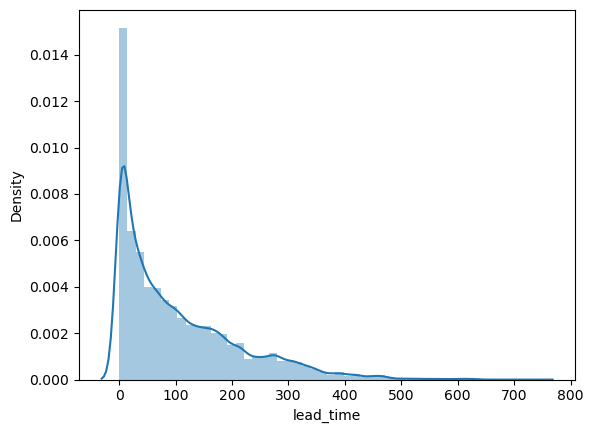

In [363]:
sns.distplot(final_dataframe["lead_time"])

In [364]:
# handling the outliers in "lead_time" for the +vely skewed data
def handle_outlier(col):
    final_dataframe[col] = np.log1p(final_dataframe[col])

In [365]:
handle_outlier("lead_time")

<Axes: xlabel='lead_time', ylabel='Density'>

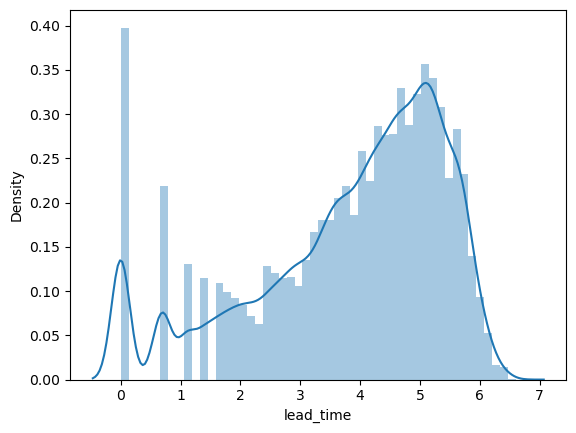

In [366]:
sns.distplot(final_dataframe["lead_time"])

<Axes: xlabel='lead_time', ylabel='Density'>

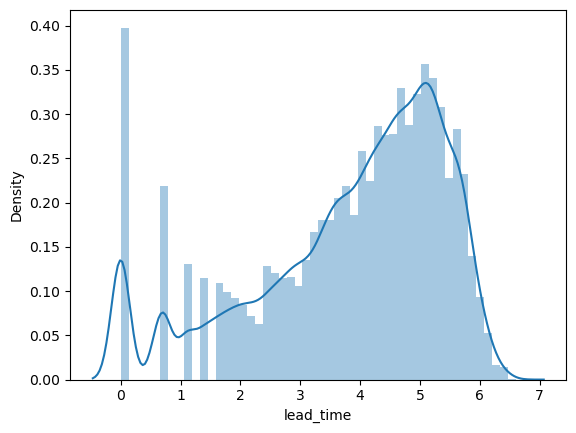

In [367]:
sns.distplot(final_dataframe["lead_time"].dropna())

In [368]:
final_dataframe["adr"].describe()           #"adr" has outliers

count    119210.000000
mean        101.969092
std          50.434007
min          -6.380000
25%          69.500000
50%          94.950000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

<Axes: xlabel='adr', ylabel='Density'>

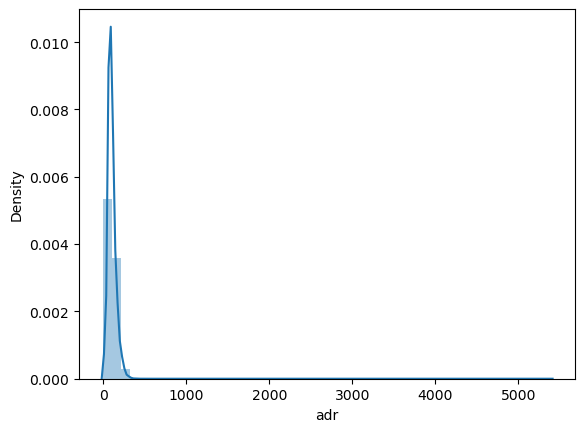

In [369]:
sns.distplot(final_dataframe["adr"])

In [370]:
handle_outlier("adr")

<Axes: xlabel='adr', ylabel='Density'>

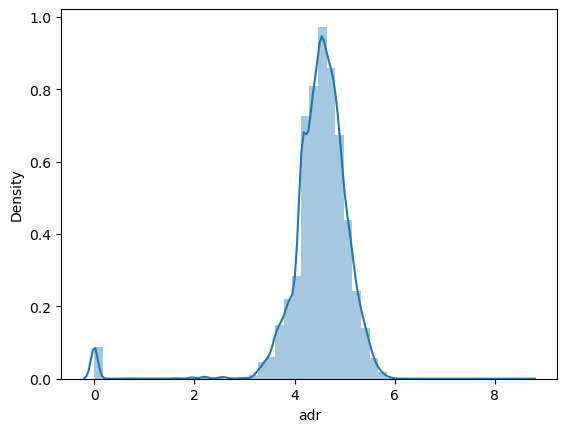

In [371]:
sns.distplot(final_dataframe["adr"])

In [372]:
# checking if there are any null values in the attributes

final_dataframe.isnull().sum()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
stays_in_week_nights              0
adults                            0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
days_in_waiting_list              0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
hotel                             0
arrival_date_month                0
meal                              0
country                           0
reserved_room_type                0
assigned_room_type                0
deposit_type                      0
customer_type                     0
reservation_status_day            0
reservation_status_month          0
reservation_status_year           0
dtype: int64

In [373]:
final_dataframe.dropna(inplace = True)

In [374]:
final_dataframe.isnull().sum()  #no null values in the data now

is_canceled                       0
lead_time                         0
arrival_date_year                 0
stays_in_week_nights              0
adults                            0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
hotel                             0
arrival_date_month                0
meal                              0
country                           0
reserved_room_type                0
assigned_room_type                0
deposit_type                      0
customer_type                     0
reservation_status_day            0
reservation_status_month          0
reservation_status_year           0
dtype: int64

# Feature Importance

In [375]:
# seperating dependent and independent variables

dependent_variable = final_dataframe["is_canceled"]
independent_variable = final_dataframe.drop("is_canceled", axis = 1)

In [376]:
dependent_variable

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119209, dtype: int64

In [377]:
independent_variable

,lead_time,arrival_date_year,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,...,arrival_date_month,meal,country,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status_day,reservation_status_month,reservation_status_year
0,5.837730,2015,0,2,0,0,0,0,3,0.0,...,0.374644,0.374106,0.567333,0.330827,0.188186,0.28402,0.407864,1,7,2015
1,6.603944,2015,0,2,0,0,0,0,4,0.0,...,0.374644,0.374106,0.567333,0.330827,0.188186,0.28402,0.407864,1,7,2015
2,2.079442,2015,1,1,0,0,0,0,0,0.0,...,0.374644,0.374106,0.202310,0.391567,0.188186,0.28402,0.407864,2,7,2015
3,2.639057,2015,1,1,0,0,0,0,0,304.0,...,0.374644,0.374106,0.202310,0.391567,0.445055,0.28402,0.407864,2,7,2015
4,2.708050,2015,2,2,0,0,0,0,0,240.0,...,0.374644,0.374106,0.202310,0.391567,0.445055,0.28402,0.407864,3,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,3.178054,2017,5,2,0,0,0,0,0,394.0,...,0.377823,0.374106,0.202391,0.391567,0.445055,0.28402,0.407864,6,9,2017
119386,4.634729,2017,5,3,0,0,0,0,0,9.0,...,0.377823,0.374106,0.185848,0.292683,0.251603,0.28402,0.407864,7,9,2017
119387,3.555348,2017,5,2,0,0,0,0,0,9.0,...,0.377823,0.374106,0.167193,0.318108,0.251373,0.28402,0.407864,7,9,2017
119388,4.700480,2017,5,2,0,0,0,0,0,89.0,...,0.377823,0.374106,0.202310,0.391567,0.445055,0.28402,0.407864,7,9,2017


In [378]:
independent_variable.columns

Index(['lead_time', 'arrival_date_year', 'stays_in_week_nights', 'adults',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'hotel', 'arrival_date_month', 'meal',
       'country', 'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status_day', 'reservation_status_month',
       'reservation_status_year'],
      dtype='object')

In [379]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [380]:
feature_sel_model = SelectFromModel(Lasso(alpha = 0.005, random_state = 0))

In [381]:
feature_sel_model.fit(independent_variable,dependent_variable)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [382]:
feature_sel_model.get_support()

array([ True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True, False, False,  True, False,  True,  True,  True])

In [383]:
cols = independent_variable.columns
cols

Index(['lead_time', 'arrival_date_year', 'stays_in_week_nights', 'adults',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'hotel', 'arrival_date_month', 'meal',
       'country', 'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status_day', 'reservation_status_month',
       'reservation_status_year'],
      dtype='object')

In [384]:
selected_feature = cols[(feature_sel_model.get_support())]

In [385]:
selected_feature

Index(['lead_time', 'arrival_date_year', 'stays_in_week_nights', 'adults',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'country',
       'deposit_type', 'reservation_status_day', 'reservation_status_month',
       'reservation_status_year'],
      dtype='object')

In [386]:
independent_variable = independent_variable[selected_feature]

In [387]:
independent_variable.columns

Index(['lead_time', 'arrival_date_year', 'stays_in_week_nights', 'adults',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'country',
       'deposit_type', 'reservation_status_day', 'reservation_status_month',
       'reservation_status_year'],
      dtype='object')

In [388]:
independent_variable

,lead_time,arrival_date_year,stays_in_week_nights,adults,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,country,deposit_type,reservation_status_day,reservation_status_month,reservation_status_year
0,5.837730,2015,0,2,0,0,3,0.0,0.0,0,0.000000,0,0,0.567333,0.28402,1,7,2015
1,6.603944,2015,0,2,0,0,4,0.0,0.0,0,0.000000,0,0,0.567333,0.28402,1,7,2015
2,2.079442,2015,1,1,0,0,0,0.0,0.0,0,4.330733,0,0,0.202310,0.28402,2,7,2015
3,2.639057,2015,1,1,0,0,0,304.0,0.0,0,4.330733,0,0,0.202310,0.28402,2,7,2015
4,2.708050,2015,2,2,0,0,0,240.0,0.0,0,4.595120,0,1,0.202310,0.28402,3,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,3.178054,2017,5,2,0,0,0,394.0,0.0,0,4.576153,0,0,0.202391,0.28402,6,9,2017
119386,4.634729,2017,5,3,0,0,0,9.0,0.0,0,5.422436,0,2,0.185848,0.28402,7,9,2017
119387,3.555348,2017,5,2,0,0,0,9.0,0.0,0,5.067079,0,4,0.167193,0.28402,7,9,2017
119388,4.700480,2017,5,2,0,0,0,89.0,0.0,0,4.657763,0,0,0.202310,0.28402,7,9,2017


# Splitting the data and Builing the Model

In [389]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(independent_variable, dependent_variable, train_size = 0.75, random_state = 45)

## Implementing logistic regression

In [390]:
from sklearn.linear_model import LogisticRegression

In [391]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train) #training of the model

LogisticRegression()

In [392]:
y_pred = logistic_model.predict(x_test)   #prediction by model

In [393]:
from sklearn.metrics import confusion_matrix

In [394]:
confusion_matrix(y_test, y_pred)

array([[15475,  3207],
       [ 5261,  5860]], dtype=int64)

In [395]:
from sklearn.metrics import accuracy_score

In [396]:
accuracy_score(y_test, y_pred)

0.7158675301144181

## Implementing different classification algorithms to decide which one is best

In [397]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [398]:
models = []

models.append(("Naive Bayes", GaussianNB()))
models.append(("Random Forest", RandomForestClassifier()))
models.append(("Decision Tree", DecisionTreeClassifier()))
models.append(("KNN", KNeighborsClassifier(n_neighbors = 5)))

In [399]:
for name, model in models:
    print(name)
    model.fit(x_train, y_train)

    #make prediction
    predictions = model.predict(x_test)

    #evaluate a model
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(y_test, predictions))
    from sklearn.metrics import accuracy_score
    print(accuracy_score(y_test, predictions))
    print("\n")
    

Naive Bayes
[[10459  8223]
 [ 1604  9517]]
0.6702680938160588


Random Forest
[[18015   667]
 [ 1648  9473]]
0.9223232560480489


Decision Tree
[[16847  1835]
 [ 1734  9387]]
0.8802469550045298


KNN
[[17368  1314]
 [ 2612  8509]]
0.8682682951380734




### As per above results we can conclude that **Random Forest** is the best model we can use to predict the Hotel Booking Cancellation of potential customers as this model has the highest accuracy of 92%.